In [1]:
from urb_kitti import *
import cv2
%matplotlib inline

Read frame transformations from KITTI sequence 00 into a list of frames (frame).

In [21]:
import numpy as np
transformations = np.load('keyframes_all_17_1.6_1.6.npy')[:,1:]
transformations = transformations.reshape(kf.shape[0], 4, 4)

Compute the frame positions by mutiplying every point by a sequence of their transformations
vectorized to improve speed

In [23]:
points = np.repeat(np.array([[0,0,0,1.0]]), len(kf), axis=0) 
for i in range(1, len(transformations)):
    points[:i] = np.dot(points[:i], kf[i].T)

convert frame positions to image coordinates

In [32]:
IMAGE_SIZE = 400
trajectoryXZ = []

minx = min([p[0] for p in points])
maxx = max([p[0] for p in points])
miny = min([p[2] for p in points])
maxy = max([p[2] for p in points])
maxxy = max(maxx, minx, maxy - miny)

for p in points:
    #print(p)
    x = IMAGE_SIZE * (p[0] - minx) / (maxxy)
    z = IMAGE_SIZE * (p[2] - miny) / (maxxy)
    trajectoryXZ.append([x, z])

draw the image

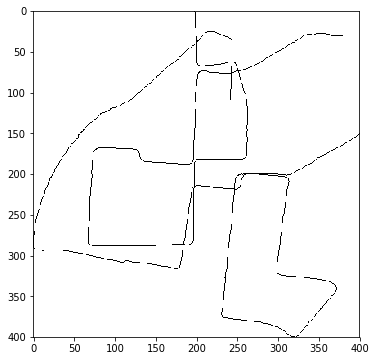

In [34]:
# Create a blank image
img = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 3), np.uint8) 
img[:] = 255 #or img.fill(255)

# Draw a black line with thickness of 2 px
for i in range(1,len(trajectoryXZ)):
    cv2.line(img, (int(trajectoryXZ[i - 1][0]), int(trajectoryXZ[i - 1][1])), (int(trajectoryXZ[i][0]), int(trajectoryXZ[i][1])), (0, 0, 0), 1)
show(img)